In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

2023-12-30 01:16:39.018382: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-30 01:16:39.198010: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-30 01:16:40.083237: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.8/lib64:/usr/local/cuda-11.3/lib64
2023-12-30 01:16:40.083330: W te

In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
with tf.compat.v1.Session(config=config) as sess:

    # 메모리 40% 할당
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 0.9
    sess = tf.compat.v1.Session(config=config)

2023-12-23 22:44:09.155051: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-23 22:44:10.149861: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78900 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:ca:00.0, compute capability: 8.0
2023-12-23 22:44:10.169217: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78900 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:ca:00.0, compute capability: 8.0


In [1]:
import pickle

with open('./Pretraning_data/ZINC_10M_data','rb') as file:
    train = pickle.load(file)

In [ ]:
from SmilesPE import tokenizer

tokenizer.atomwise_tokenizer(train[1])

In [8]:
from SmilesPE import tokenizer

In [6]:
from rdkit import Chem
from tqdm import tqdm
def Chem_generator(smiles):
    res_list = []
    for i in tqdm(smiles):
        mol = Chem.MolFromSmiles(i)
        temp = []
        index = 0
        while(len(set(temp))!=4 and index != 100):
            index+=1
            temp.append(Chem.MolToSmiles(mol,doRandom=True))
        res_list+=list(set(temp))
    return res_list

In [3]:
train_1 = Chem_generator(train)

  0%|          | 432/12525050 [00:00<1:37:37, 2138.06it/s]

100%|██████████| 12525050/12525050 [1:14:21<00:00, 2807.07it/s]


In [4]:
from tdc.single_pred import Tox
from Module import RDK as rk
import atomInSmiles
from Module import Fine_tune
from SmilesPE import tokenizer

In [5]:
from multiprocessing import Pool
from tqdm import tqdm
from multiprocessing import Process, Value, Array
from multiprocessing import Process,Manager,current_process
from Module import RDK as rk
import atomInSmiles 
from SmilesPE import tokenizer

train_set = []
for i in tqdm(train_1):
    train_set.append(tokenizer.atomwise_tokenizer(i))


  0%|          | 0/50100189 [00:00<?, ?it/s]

100%|██████████| 50100189/50100189 [08:07<00:00, 102816.16it/s]


Text(0, 0.5, 'counts')

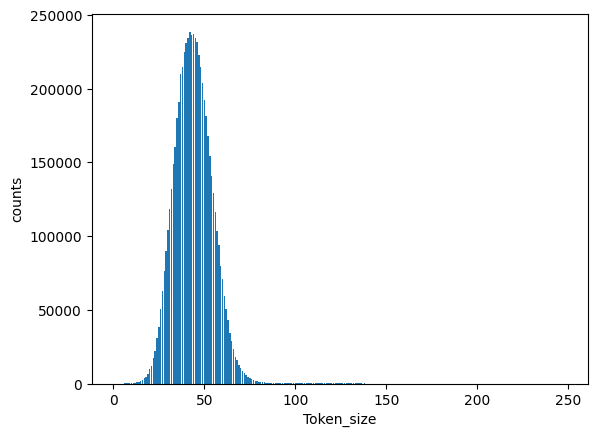

In [47]:
import matplotlib.pyplot as plt
length_list = {}


for index,i in enumerate(train_set_plus):
    try:
        length_list[len(i)]=length_list[len(i)]+1
    except:
        length_list[len(i)] = 1
    
plt.bar(length_list.keys(),length_list.values())
plt.xlabel(xlabel='Token_size')
plt.ylabel('counts')    

In [7]:
temp_dict = {}
for i in train_set:
    for j in i:
        try:
            temp_dict[j] = temp_dict[j] + 1
        except:
            temp_dict[j] = 1
remove_dict = {}
for i in temp_dict.keys():
    if temp_dict[i]<50:
        print(i,temp_dict[i])
        remove_dict[i] = 1

remove_list = []
for index,i in enumerate(train_set):
    for j in i:
        try:
            remove_dict[j]
            remove_list.append(index)
            break
        except:
            continue

remove_list.sort(reverse=True)

[P@H+] 48
[P@@H+] 48
9 12
%10 4
[CH] 16
p 16
[CH2] 24
[Si-] 4
[P@+] 33
[P@@+] 31
[NH] 8
[17O] 12
[p+] 4


In [4]:
import pickle
with open('./Pretraning_data/Random_ZINC_50M_SMILE_tokken.pkl','rb') as file:
    train_set = pickle.load(file)

In [ ]:
train_set

In [8]:
import pickle
molecule_dictionary = {'<start>':1,'<end>':2,'<unknown1>':3,'<unknown2>':4,'<unknown3>':5,'<unknow4>':6,'<unknown5>':7}

for molecule in train_set:
    for atom in molecule:
        try:
            molecule_dictionary[atom]
        except:
            molecule_dictionary[atom] = len(molecule_dictionary)+1
with open('./BERT/SMILE/1M_random_ZINC_word2index.pkl','wb') as file:
    pickle.dump(molecule_dictionary,file)
len(molecule_dictionary)

71

In [133]:
import pickle
with open('./BERT/SMILE/1M_random_ZINC_word2index.pkl','rb') as file:
    molecule_dictionary = pickle.load(file)
len(molecule_dictionary)

141

In [5]:
from tqdm import tqdm
import numpy as np 

def word_to_index(train_set,dict):
    result = []
    for molecule in tqdm(train_set):
        temp_list = []
        temp_list.append(1)
        for atom in molecule:
            temp_list.append(dict[atom])
        while len(temp_list)!=200:
            temp_list.append(0)
        result.append(temp_list)
    return result
embedding_word = word_to_index(train_set,molecule_dictionary)   
embedding_word = np.array(embedding_word)

  0%|          | 0/50099943 [00:00<?, ?it/s]

100%|██████████| 50099943/50099943 [13:26<00:00, 62145.99it/s] 


In [9]:
from tdc.single_pred import Tox
from Module import RDK
import atomInSmiles

def word_to_index(train_set,dict):
    result = []
    for molecule in tqdm(train_set):
        temp_list = []
        temp_list.append(1)
        for atom in molecule:
            temp_list.append(dict[atom])
        while len(temp_list)!=200:
            temp_list.append(0)
        result.append(temp_list)
    return result
train_val,tox_info = Tox(name = 'AMES').get_data(format = 'DeepPurpose')
train_set_val = []

train_val = Chem_generator(train_val[:5000])


for i in train_val:
    train_set_val.append(tokenizer.atomwise_tokenizer(i))
val_remove_list = []
for index,i in enumerate(train_set_val):
    for j in i:
        try:
            molecule_dictionary[j]
        except:
            val_remove_list.append(index)
            break
val_remove_list.sort(reverse=True)

for i in val_remove_list:
    train_set_val.pop(i)

embedding_word_val = word_to_index(train_set_val,molecule_dictionary)   
embedding_word_val = np.array(embedding_word_val)

Found local copy...
Loading...
Done!
100%|██████████| 19957/19957 [00:00<00:00, 71889.96it/s]


In [10]:
embedding_word_val

array([[ 1, 23, 41, ...,  0,  0,  0],
       [ 1, 11, 10, ...,  0,  0,  0],
       [ 1, 11, 10, ...,  0,  0,  0],
       ...,
       [ 1, 11, 10, ...,  0,  0,  0],
       [ 1,  8, 10, ...,  0,  0,  0],
       [ 1,  8, 10, ...,  0,  0,  0]])

In [11]:
import random
max = 16
mask_input_val = []
for j in tqdm(train_set_val):
        value = []
        number = int(len(j)*0.15)
        if number>max:
                max = number
        if number == 0:
                number = 1
        value += random.sample(range(1,len(j)),number)
        mask_input_val.append(value)
        
        
for j in mask_input_val:
        while(len(j)<max):
                j.append(-1)


random_value_val = embedding_word_val.copy()        
for _,index in enumerate(mask_input_val):
        for j in index:
                if j != -1:
                        prob = np.random.rand(1)[0]
                        if prob < 0.8:
                                random_value_val[_][j] = 5
                        elif prob > 0.9:
                                temp1 = random.sample(range(0,301),1)[0]
                                random_value_val[_][j] = temp1
                                
output_val = tf.multiply(tf.reduce_sum(tf.one_hot(mask_input_val,200),axis=1),embedding_word_val)

  0%|          | 0/19957 [00:00<?, ?it/s]

100%|██████████| 19957/19957 [00:00<00:00, 230597.46it/s]
2023-12-30 01:39:21.152372: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-30 01:39:21.672732: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78900 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:ca:00.0, compute capability: 8.0


In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import *
early_stopping_cb = EarlyStopping(patience=6, monitor='loss',restore_best_weights=True)

In [114]:
def custom_loss(y_true, y_pred):
    output = tf.one_hot(tf.cast(tf.boolean_mask(y_true,tf.cast(y_true,bool)),tf.int32),len(molecule_dictionary))
    loss = tf.keras.losses.CategoricalCrossentropy()(output,y_pred)
    return loss

In [14]:
def Custom_metric(y_true,y_pred):
    predictions = tf.argmax(y_pred,axis=1)
    true = tf.boolean_mask(y_true,tf.cast(y_true,bool))
    return  tf.metrics.Accuracy()(predictions,true)
def Mask_acc(y_true, y_pred):
    score = tf.py_function(func=Custom_metric, inp=[y_true, y_pred], Tout=tf.float32,  name='Custom_acc') 
    return score

In [15]:
class BERT(tf.keras.layers.Layer):
    def __init__(self,emb_dim,num_heads,ff_dim):
        super(BERT, self).__init__()
        self.transformer = TransformerBlock(emb_dim,num_heads,ff_dim)
        
        self.embedding = TokenAndPositionEmbedding(200,3500,256)
        self.dense = layers.Dense(250,activation = 'gelu')
        self.classify = layers.Dense(len(molecule_dictionary),activation = 'softmax')
    def call(self, inputs, mask_index,pretrain = False):
        if pretrain:
            mask_index = tf.one_hot(mask_index,200)
            boolean_mask = tf.cast(tf.reduce_sum(mask_index,axis=1),bool)
            inputs = tf.cast(inputs,dtype=tf.int32)
        
        hidden = self.embedding(inputs)
        for i in range(8):
            hidden = self.transformer(hidden)
    
        if pretrain:
            output = tf.reshape(hidden,[-1,200,256])
            output = tf.boolean_mask(output,boolean_mask)
            output = self.dense(output)
            output = layers.Dropout(0.1)(output)
            output = self.classify(output)
            return output
        else:
            return hidden

In [16]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim,mask_zero=True)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim,mask_zero = True)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=1, limit=maxlen+1, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [3]:
a = {'AIS':0,'SMILE':1,'SPE':2}
print('abs ', list(a.keys()))

abs  ['AIS', 'SMILE', 'SPE']


In [17]:
from Module import custom_layers

In [18]:
BERT_tensor = custom_layers.BERT_tensor

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf
import pickle
import copy
import tensorflow as tf
import tensornetwork as tn
import numpy as np
import tensornetwork as tn
class TNLayer(tf.keras.layers.Layer):
    def __init__(self,Tensor_dimention = 2):
        super(TNLayer, self).__init__()
        # Create the variables for the layer.


    
        initializer = tf.keras.initializers.RandomNormal(stddev=1/np.sqrt(4+Tensor_dimention-1))
        initializer1 = tf.keras.initializers.RandomNormal(stddev=1/np.sqrt(4+Tensor_dimention+Tensor_dimention-1))
        self.A1 = tf.Variable(initializer(shape=[4,Tensor_dimention,4]),name="a1", trainable=True)
        self.A2 = tf.Variable(initializer1(shape=[4,Tensor_dimention,Tensor_dimention,8]),name="a2", trainable=True)
        self.A3 = tf.Variable(initializer1(shape=[4,Tensor_dimention,Tensor_dimention,8]),name="a3", trainable=True)
        self.A4 = tf.Variable(initializer(shape=[4,Tensor_dimention,4]),name="a4", trainable=True)
        


        self.bias = tf.Variable(tf.zeros(shape=(256*4)), name="bias", trainable=True)
        
    def call(self, inputs):
        # Define the contraction.
        # We break it out so we can parallelize a batch using
        # tf.vectorized_map (see below).
        Nodes = [tn.Node(self.A1,'a1',backend="tensorflow")]
        Nodes+=[tn.Node(self.A2,f'a{2}',backend="tensorflow")]
        Nodes+=[tn.Node(self.A3,f'a{3}',backend="tensorflow")]
        Nodes+=[tn.Node(self.A4,f'a{4}',backend="tensorflow")]
        input_vec = tf.reshape(inputs, [-1,200,4,4,4,4])
        T_node = tn.Node(input_vec , backend="tensorflow",name = 't') 
        for i in range(len(Nodes)-1):
            if i == 0:
                Nodes[i][1]^Nodes[i+1][1]
            else:
                Nodes[i][2]^Nodes[i+1][1]
        for i in range(len(Nodes)):
            Nodes[i][0]^T_node[i+2]
        
        bias_var = self.bias
        contraction = T_node@Nodes[0]
        for i in range(1,len(Nodes)):
            contraction = contraction@Nodes[i]
        result = tf.reshape(contraction.tensor,[-1,200,256*4])
        result = result + bias_var
        return result


class TokenAndPositionEmbedding_mask(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim,start_index = 0):
        super().__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim,mask_zero=True)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim,mask_zero = True)
        
        self.positions = np.array([0]*start_index+[i+1 for i in range(200-start_index)])
    def call(self, x):
        positions = self.pos_emb(self.positions)
        mask = self.token_emb.compute_mask(x)
        x = self.token_emb(x)
        return x + positions,mask

class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim,start_index = 0):
        super().__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim,mask_zero=True)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim,mask_zero = True)
        self.positions = np.array([0]*start_index+[i+1 for i in range(200-start_index)])
    def call(self, x):
        positions = self.pos_emb(self.positions)
        x = self.token_emb(x)
        return x + positions


class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        l2_reg = tf.keras.regularizers.l2(0.01)
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim,kernel_regularizer=l2_reg,dropout=0.1)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(ff_dim, activation="relu"), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)
    
class TransformerBlock_Tensor(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1,Tensor_dimention=2):
        super().__init__()
        self.att = MultiheadAttention_tensor(d_model=embed_dim,num_heads=num_heads,Tensor_dimention=Tensor_dimention,dropout=0)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(ff_dim, activation="relu"), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs,mask=None):
        attn_output,_ = self.att(inputs,mask)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)
import tensorflow as tf

import tensorflow as tf

class MultiheadAttention_tensor(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads,classical_rate = 1/3,Tensor_dimention = 2,dropout=0):
        super(MultiheadAttention_tensor, self).__init__()
        #assert d_model % num_heads == 0
        self.num_heads = num_heads
        self.depth = d_model
        self.rate = classical_rate
        assert int(num_heads/classical_rate) == num_heads/classical_rate



        self.wq = tf.keras.layers.Dense(int(d_model)*int(num_heads*classical_rate))
        self.wk = tf.keras.layers.Dense(int(d_model)*int(num_heads*classical_rate))
        self.wv = tf.keras.layers.Dense(int(d_model)*int(num_heads*classical_rate))
        self.dropout = dropout
        self.wq_tensor = TNLayer(Tensor_dimention)
        self.wk_tensor = TNLayer(Tensor_dimention)
        self.wv_tensor = TNLayer(Tensor_dimention)

        self.dense = tf.keras.layers.Dense(d_model,kernel_initializer='lecun_normal')

    def split_heads(self, x, batch_size):
        print
        x = tf.reshape(x, (batch_size, -1, int(self.num_heads*self.rate), self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    def split_heads_tensor(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, int(self.num_heads*(1-self.rate)), self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    def call(self, q, mask):
        batch_size = tf.shape(q)[0]
        k = q
        v = q
        
        q_class = self.split_heads(self.wq(q), batch_size)

        
        k_class = self.split_heads(self.wk(k), batch_size)

        
        v_class = self.split_heads(self.wv(v), batch_size)
        
        
        q_tensor = self.split_heads_tensor(self.wq_tensor(q),batch_size)

        
        k_tensor = self.split_heads_tensor(self.wk_tensor(k),batch_size)

        
        v_tensor = self.split_heads_tensor(self.wv_tensor(v),batch_size)

        q,k,v = tf.concat([q_class,q_tensor],axis=1),tf.concat([k_class,k_tensor],axis=1),tf.concat([v_class,v_tensor],axis=1)

        scaled_attention, attention_weights = self.scaled_dot_product_attention(q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.depth*self.num_heads))

        output = self.dense(concat_attention)
        return output, attention_weights

    def scaled_dot_product_attention(self, q, k, v, mask):
        matmul_qk = tf.matmul(q, k, transpose_b=True)
        dk = tf.cast(tf.shape(k)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
        scaled_attention_logits = tf.transpose(scaled_attention_logits,perm=[1,0,2,3])
        if mask is not None:
            scaled_attention_logits += (mask * -1e9)
        scaled_attention_logits = tf.transpose(scaled_attention_logits,perm=[1,0,2,3])
        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        attention_weights = tf.keras.layers.Dropout(self.dropout)(attention_weights)
        output = tf.matmul(attention_weights, v)
        return output, attention_weights

    
    
def Attention_mask(embedding_mask):
    embedding_mask = tf.logical_not(embedding_mask)
    embedding_mask = tf.cast(embedding_mask,tf.float32)
    embedding_mask = tf.expand_dims(embedding_mask,axis=-1)
    embedding_mask = tf.tile(embedding_mask,[1,1,200])
    embedding_mask = tf.transpose(embedding_mask,perm=[0,2,1])
    return embedding_mask

class BERT_tensor(tf.keras.layers.Layer):
    def __init__(self,emb_dim,num_heads,ff_dim,CL_num = 3,strat_index = 0,Tensor_dimention = 2):
        super(BERT_tensor, self).__init__()
        self.encoder = [TransformerBlock_Tensor(emb_dim,num_heads,ff_dim,Tensor_dimention=Tensor_dimention) for i in range(8)]
        #self.encoder = TransformerBlock_Tensor(emb_dim,num_heads,ff_dim)
        self.embedding = TokenAndPositionEmbedding_mask(200,3500,256,start_index=strat_index)
        self.classify = layers.Dense(CL_num,activation = 'softmax')
    def call(self, inputs, mask_index=None,pretrain = False,att_mask = None):
        if pretrain:
            mask_index = tf.one_hot(mask_index,200)
            boolean_mask = tf.cast(tf.reduce_sum(mask_index,axis=1),bool)
            inputs = tf.cast(inputs,dtype=tf.int32)
            
        hidden,pad_mask = self.embedding(inputs)
        Att_mask = Attention_mask(pad_mask)
        if att_mask is not None:
            Att_mask = (Att_mask+att_mask)%2
        
        for i in range(8):
            hidden = self.encoder[i](hidden,Att_mask)
    
        if pretrain:
            output = tf.reshape(hidden,[-1,200,256])
            output = self.classify(output)
            output = tf.boolean_mask(output,boolean_mask)
            return output
        else:
            return hidden
        
class BERT(tf.keras.layers.Layer):
    def __init__(self,emb_dim,num_heads,ff_dim,CL_num = 3):
        super(BERT, self).__init__()
        self.encoder = [TransformerBlock(emb_dim,num_heads,ff_dim) for i in range(8)]
        #self.encoder = TransformerBlock(emb_dim,num_heads,ff_dim)
        self.embedding = TokenAndPositionEmbedding(200,3500,256)
        self.dense = layers.Dense(250,activation = 'gelu')
        self.classify = layers.Dense(CL_num,activation = 'softmax')
    def call(self, inputs, mask_index,pretrain = False):
        if pretrain:
            mask_index = tf.one_hot(mask_index,200)
            boolean_mask = tf.cast(tf.reduce_sum(mask_index,axis=1),bool)
            inputs = tf.cast(inputs,dtype=tf.int32)
 
        hidden = self.embedding(inputs)
        for i in range(8):
            hidden = self.encoder[i](hidden)
    
        if pretrain:
            output = tf.reshape(hidden,[-1,200,256])
            output = self.classify(output)
            output = tf.boolean_mask(output,boolean_mask)
            return output
        else:
            return hidden

In [141]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.layers import Embedding

inputs = Input(shape = (200,),dtype=tf.int32)
mask = Input(shape = (16), dtype=tf.int32)
outputs = BERT_tensor(256,6,1024,len(molecule_dictionary))(inputs,mask,pretrain=True)
#outputs = BERT_tensor(256,6,1024,121)(inputs,mask,pretrain=True)

model = Model(inputs = [inputs,mask], outputs = [outputs])
model.summary()
optmizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=optmizer,loss = custom_loss,metrics = Mask_acc)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 200)]        0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, 16)]         0           []                               
                                                                                                  
 bert_tensor_7 (BERT_tensor)    (None, 141)          11534221    ['input_15[0][0]',               
                                                                  'input_16[0][0]']               
                                                                                                  
Total params: 11,534,221
Trainable params: 11,534,221
Non-trainable params: 0
______________

In [32]:
optmizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optmizer,loss = custom_loss,metrics = Mask_acc)

In [33]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=2000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)
    self.batch_count
    self.warmup_steps = warmup_steps

  def __call__(self, step):
    self.batch_count += 1
    step = float(step+1)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(1000.) * tf.math.minimum(arg1, arg2)

In [34]:
class CustomLearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, warmup_steps=4000):
        super(CustomLearningRateScheduler, self).__init__()
        self.warmup_steps = warmup_steps
        self.step = tf.Variable(0, trainable=False)

    def __call__(self, step):
        self.step.assign_add(1)  # 각 배치가 지나갈 때마다 step 증가
        lr = tf.cond(
            self.step <= self.warmup_steps,
            lambda: (1e-4 - 1e-9) / self.warmup_steps * tf.cast(self.step, tf.float32) + 1e-9,
            lambda: 0.5 * (1e-4 + 1e-9) * (self.warmup_steps ** 0.5) / (tf.cast(self.step, tf.float32) ** 0.5)
        )
        return lr

In [35]:
lr = CustomLearningRateScheduler()
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer= optimizer, loss = custom_loss, metrics= Mask_acc)

In [112]:
paras = model.weights

In [119]:
model.layers[2].embedding.set_weights(paras[248:250])

In [121]:
for i in range(8):
    model.layers[2].encoder[i].set_weights(paras[31*i:31*(i+1)])

In [103]:
model.load_weights('./BERT/SMILE/small_tensor_Random_ZINC_L_model_weights')

In [197]:

import random
size = 300000
for k in range(1):
        for i in range(0,int(len(embedding_word)/size)):
                if k == 0:
                        i = i + 8
                if i == int(len(embedding_word)/size):
                        break
                if i <10:
                        lr = (1e-4-1e-6)*(i)/10 + 1e-6
                else:
                        lr = 1e-4*np.sqrt(10)/np.sqrt(i)
                optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
                model.compile(optimizer= optimizer, loss = custom_loss, metrics= Mask_acc)
                max = 16
                mask_input = []
                for j in tqdm(train_set[size*i:size*(i+1)]):
                        value = []
                        number = int(len(j)*0.15)
                        if number>max:
                                number = max
                        if number == 0:
                                number = 1
                        value += random.sample(range(1,len(j)),number)
                        mask_input.append(value)
                        
                        
                for j in mask_input:
                        while(len(j)<max):
                                j.append(-1)
                
                
                
                
                
                
                inputs1 = embedding_word[size*i:size*(i+1)]
                inputs2 = mask_input
                output = tf.multiply(tf.reduce_sum(tf.one_hot(inputs2,200),axis=1),inputs1)

                
                random_value = inputs1.copy()        
                for _,index in enumerate(inputs2):
                        for j in index:
                                if j != -1:
                                        prob = np.random.rand(1)[0]
                                        if prob < 0.8:
                                                random_value[_][j] = 5
                                        elif prob > 0.9:
                                                temp1 = random.sample(range(0,301),1)[0]
                                                random_value[_][j] = temp1
                                                
                
                
                print(f'This is {i} number step')
                with tf.device('/device:GPU:0'):
                        if i % 4 == 0:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=32,callbacks = [early_stopping_cb],validation_data=([np.array(random_value_val),np.array(mask_input_val)],np.array(output_val)))
                        else:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=32,callbacks = [early_stopping_cb])
                        print(model.optimizer.lr)
                        model.save_weights('./BERT/SMILE/small_tensor_Random_ZINC_L_model_weights')

100%|██████████| 300000/300000 [00:01<00:00, 180090.93it/s]


This is 8 number step
9375/9375 [==============================] - 1032s 107ms/step - loss: 0.3186 - Mask_acc: 0.8884 - val_loss: 0.6662 - val_Mask_acc: 0.8048
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.02e-05>


100%|██████████| 300000/300000 [00:01<00:00, 177012.10it/s]


This is 9 number step
9375/9375 [==============================] - 963s 100ms/step - loss: 0.2902 - Mask_acc: 0.8986
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.01e-05>


100%|██████████| 300000/300000 [00:01<00:00, 202047.72it/s]


This is 10 number step
9375/9375 [==============================] - 960s 99ms/step - loss: 0.2683 - Mask_acc: 0.9057
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 192133.36it/s]


This is 11 number step
9375/9375 [==============================] - 971s 101ms/step - loss: 0.2656 - Mask_acc: 0.9054
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.534626e-05>


100%|██████████| 300000/300000 [00:01<00:00, 191407.66it/s]


This is 12 number step
9375/9375 [==============================] - 1035s 107ms/step - loss: 0.2476 - Mask_acc: 0.9100 - val_loss: 0.7585 - val_Mask_acc: 0.7793
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.12871e-05>


100%|██████████| 300000/300000 [00:01<00:00, 181485.86it/s]


This is 13 number step
9375/9375 [==============================] - 964s 100ms/step - loss: 0.2158 - Mask_acc: 0.9212
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.7705805e-05>


100%|██████████| 300000/300000 [00:01<00:00, 190477.97it/s]


This is 14 number step
9375/9375 [==============================] - 964s 100ms/step - loss: 0.2246 - Mask_acc: 0.9182
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.451543e-05>


100%|██████████| 300000/300000 [00:01<00:00, 189102.27it/s]


This is 15 number step
9375/9375 [==============================] - 975s 101ms/step - loss: 0.2145 - Mask_acc: 0.9211
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.164966e-05>


100%|██████████| 300000/300000 [00:01<00:00, 181952.02it/s]


This is 16 number step
9375/9375 [==============================] - 1034s 107ms/step - loss: 0.2132 - Mask_acc: 0.9218 - val_loss: 0.7305 - val_Mask_acc: 0.7852
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.905694e-05>


100%|██████████| 300000/300000 [00:01<00:00, 185956.44it/s]


This is 17 number step
1302/9375 [===>..........................] - ETA: 13:44 - loss: 0.1996 - Mask_acc: 0.9260

KeyboardInterrupt: 

In [286]:
from Module.custom_layers import Attention_mask

hidden,mask = model.layers[2].embedding(random_value[:10])
mask = Attention_mask(mask)
index = 2
for i in range(index):
    hidden = model.layers[2].encoder[i](hidden,mask)
_,output = model.layers[2].encoder[index].att(hidden,mask)

<Axes: >

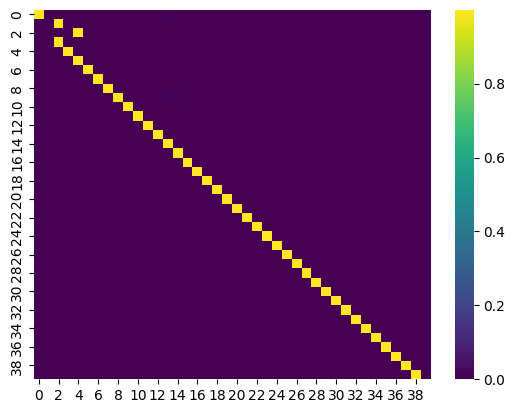

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(output[4][4][0:40,0:40], cmap='viridis', fmt=".2f")

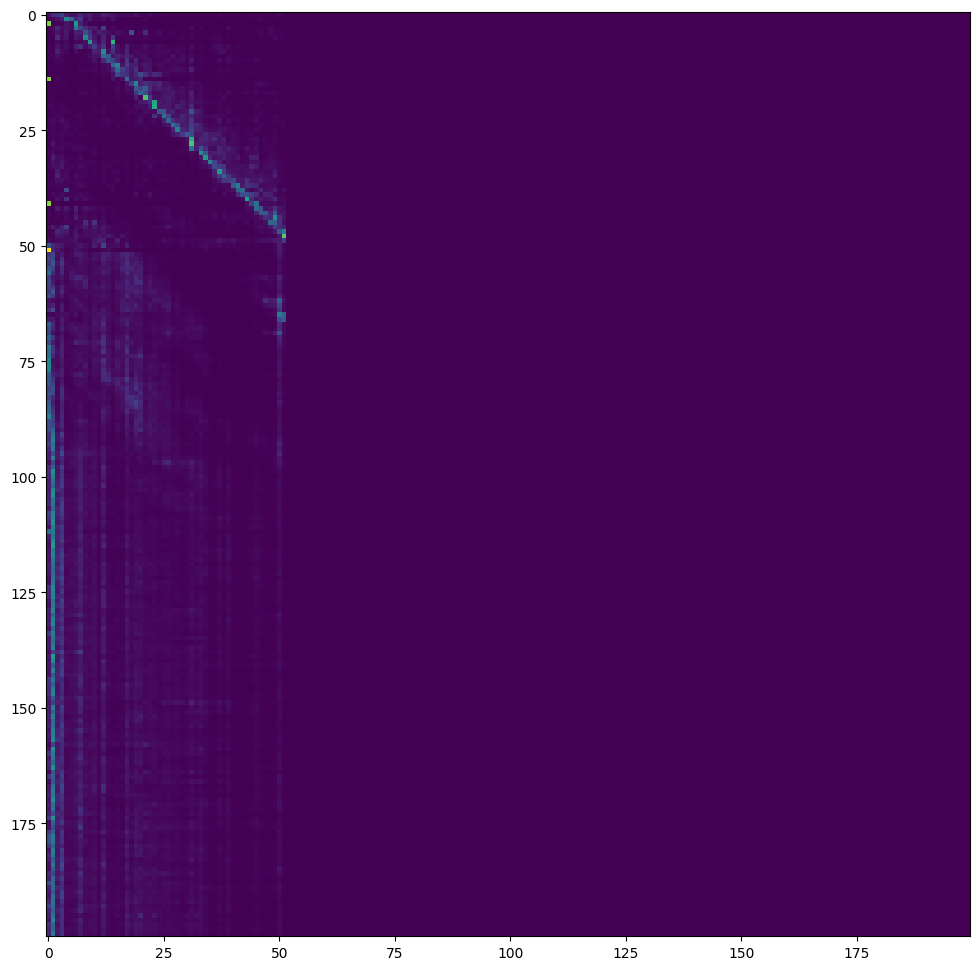

In [288]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(24,12))
plt.imshow(tf.reduce_mean(output[5][:2],axis=0), cmap='viridis')

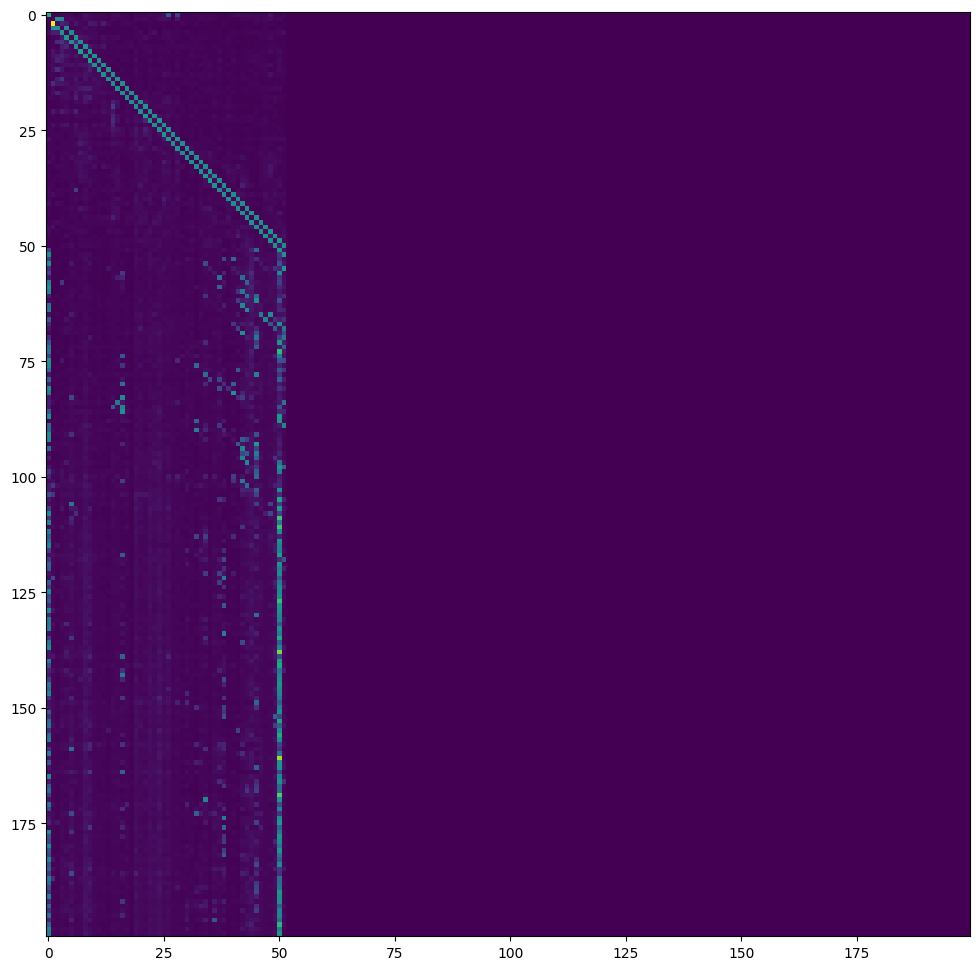

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(24,12))
plt.imshow(tf.reduce_mean(output[5][2:],axis=0), cmap='viridis')

In [248]:
import os
import pickle

# 폴더 경로 설정
folder_path = './Final_data_token_SMILE/CLS/'  # 해당 경로를 실제 폴더 경로로 바꿔주세요

# 빈 리스트 초기화
merged_data = []

# 폴더 내의 모든 .pkl 파일을 탐색
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'rb') as file:
        # .pkl 파일 열기
        try:
            data = pickle.load(file)
            # 데이터를 하나의 리스트에 추가
            merged_data+=data[0]
            print(file_path,len(data[0]))
        except:
            pass
remove_list = []

for index,i in enumerate(merged_data):
    if len(i)>=180 or len(i)<5:
        remove_list.append(index)

remove_list.sort(reverse=True)

for i in remove_list:
    merged_data.pop(i)

./Final_data_token_SMILE/CLS/BBBP_vNN-ADMET 6696


./Final_data_token_SMILE/CLS/Hepatotoxicity-Cytotoxicity-HepG2_vNN-ADMET 121907
./Final_data_token_SMILE/CLS/CYP2C9_Inhibitor_vNN-ADMET 161019
./Final_data_token_SMILE/CLS/CYP2C19_Inhibitor_vNN-ADMET 162651
./Final_data_token_SMILE/CLS/CYP2D6_Inhibitor_vNN-ADMET 155680
./Final_data_token_SMILE/CLS/HLM_metab_vNN-ADMET 64380
./Final_data_token_SMILE/CLS/BBBP_MoleculeNet 40204
./Final_data_token_SMILE/CLS/DILI_vNN-ADMET 27864
./Final_data_token_SMILE/CLS/CYP1A2_Inhibitor_vNN-ADMET 150716
./Final_data_token_SMILE/CLS/BBBP_MoleculeNet_clean 40197
./Final_data_token_SMILE/CLS/CYP3A4_Inhibitor_vNN-ADMET 204184


In [238]:
import os
import pickle

# 폴더 경로 설정
folder_path = './Final_data_token_SMILE/REG/'  # 해당 경로를 실제 폴더 경로로 바꿔주세요

# 빈 리스트 초기화

# 폴더 내의 모든 .pkl 파일을 탐색
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'rb') as file:
        # .pkl 파일 열기
        try:
            data = pickle.load(file)
            # 데이터를 하나의 리스트에 추가
            merged_data+=data[0]
            print(file_path,len(data[0]))
        except:
            pass
remove_list = []

for index,i in enumerate(merged_data):
    if len(i)>=180:
        remove_list.append(index)

remove_list.sort(reverse=True)

for i in remove_list:
    merged_data.pop(i)

./Final_data_token_SMILE/REG/Lipophilicity_moleculenet 83975
./Final_data_token_SMILE/REG/FreeSolveSAMPL 9523


In [ ]:
import os
import pickle
asd
# 폴더 경로 설정
folder_path = './Final_data_token_SMILE/TOX/'  # 해당 경로를 실제 폴더 경로로 바꿔주세요

# 빈 리스트 초기화

# 폴더 내의 모든 .pkl 파일을 탐색
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'rb') as file:
        # .pkl 파일 열기
        try:
            data = pickle.load(file)
            # 데이터를 하나의 리스트에 추가
            merged_data+=data[0][0]
            print(file_path,len(data[0][0]))
        except:
            pass
remove_list = []

for index,i in enumerate(merged_data):
    if len(i)>=180:
        remove_list.append(index)

remove_list.sort(reverse=True)

for i in remove_list:
    merged_data.pop(i)

./Final_data_token_SMILE/TOX/Carcinogens_Lagunin 5501
./Final_data_token_SMILE/TOX/DILI 9403
./Final_data_token_SMILE/TOX/ClinTox 29009
./Final_data_token_SMILE/TOX/LD50_Zhu 141235
./Final_data_token_SMILE/TOX/hERG 13092
./Final_data_token_SMILE/TOX/AMES 139901
./Final_data_token_SMILE/TOX/hERG_Karim 268795
./Final_data_token_SMILE/TOX/Skin Reaction 7711


In [239]:
from tqdm import tqdm
import numpy as np 

def word_to_index(train_set,dict):
    result = []

    for molecule in tqdm(train_set):
        temp_list = []
        temp_list.append(1)
        for atom in molecule:
            try:
                temp_list.append(dict[atom])
            except:
                print(atom)
                dict[atom] = len(dict)+1
        while len(temp_list)<200:
            temp_list.append(0)
        if len(temp_list) == 200:
            result.append(temp_list)

    return result
embedding_word_merge = word_to_index(merged_data,molecule_dictionary)   
embedding_word_merge = np.array(embedding_word_merge)

  0%|          | 4701/1227608 [00:00<00:26, 47003.21it/s]

100%|██████████| 1227608/1227608 [00:18<00:00, 67734.86it/s]


In [254]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 200)]        0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, 16)]         0           []                               
                                                                                                  
 bert_tensor_7 (BERT_tensor)    (None, 141)          11534221    ['input_15[0][0]',               
                                                                  'input_16[0][0]']               
                                                                                                  
Total params: 11,534,221
Trainable params: 11,534,221
Non-trainable params: 0
______________

In [251]:
embedding_word_merge[300000:300015]

array([[ 1, 11, 10, ...,  0,  0,  0],
       [ 1,  8, 11, ...,  0,  0,  0],
       [ 1,  9, 10, ...,  0,  0,  0],
       ...,
       [ 1,  8, 12, ...,  0,  0,  0],
       [ 1, 20,  8, ...,  0,  0,  0],
       [ 1,  9, 10, ...,  0,  0,  0]])

In [137]:
len(molecule_dictionary)

141

In [253]:
len(molecule_dictionary)

141

In [252]:

import random
size = 300000
for k in range(1):
        for i in range(0,int(len(embedding_word_merge)/size)):
                lr = CustomLearningRateScheduler()
                if k == 0:
                        i = i
                """
                if i == int(len(embedding_word_merge)/size):
                        break
                if i+50 <80:
                        lr = (1e-4-1e-6)*(i)/80 + 1e-6
                else:
                        lr = 1e-4*np.sqrt(80)/np.sqrt(i)"""
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
                model.compile(optimizer= optimizer, loss = custom_loss, metrics= Mask_acc)
                max = 16
                mask_input = []
                print(i)
                for j in tqdm(merged_data[size*i:size*(i+1)]):
                        value = []
                        number = int(len(j)*0.15)
                        if number>max:
                                number = max
                        if number == 0:
                                number = 1
                        value += random.sample(range(1,len(j)),number)
                        mask_input.append(value)
                        
                        
                for j in mask_input:
                        while(len(j)<max):
                                j.append(-1)
                
                inputs1 = embedding_word_merge[size*i:size*(i+1)]
                inputs2 = mask_input
                output = tf.multiply(tf.reduce_sum(tf.one_hot(inputs2,200),axis=1),inputs1)

                
                random_value = inputs1.copy()        
                for _,index in enumerate(inputs2):
                        for j in index:
                                if j != -1:
                                        prob = np.random.rand(1)[0]
                                        if prob < 0.8:
                                                random_value[_][j] = 5
                                        elif prob > 0.9:
                                                temp1 = random.sample(range(0,len(molecule_dictionary)),1)[0]
                                                random_value[_][j] = temp1
                                                
                
                
                print(f'This is {i} number step')
                with tf.device('/device:GPU:0'):
                        if i % 3 == 0:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=32,validation_data=([np.array(random_value_val),np.array(mask_input_val)],np.array(output_val)))
                        else:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=32)
                        print(model.optimizer.lr)
                        with open('./BERT/SMILE/Pre_BERT.pkl','wb') as file:
                                paras = model.weights[:250]
                                pickle.dump(paras,file)
                        #model.save_weights('./BERT/SMILE/small_tensor_Random_ZINC_L_model_weights')

0


  0%|          | 0/300000 [00:00<?, ?it/s]

100%|██████████| 300000/300000 [00:01<00:00, 171297.79it/s]


This is 0 number step


2023-12-30 17:11:04.331913: W tensorflow/core/framework/op_kernel.cc:1818] INVALID_ARGUMENT: required broadcastable shapes
2023-12-30 17:11:04.362970: W tensorflow/core/framework/op_kernel.cc:1818] INVALID_ARGUMENT: ValueError: Shapes (213,) and (212,) are incompatible
Traceback (most recent call last):

  File "/home/yslee/.local/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    return func(device, token, args)

  File "/home/yslee/.local/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 147, in __call__
    outputs = self._call(device, args)

  File "/home/yslee/.local/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 154, in _call
    ret = self._func(*args)

  File "/home/yslee/.local/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/tmp/ipykernel_848373/4093268093.py", line 4, in Custom_metric
    return  tf.met

InvalidArgumentError: Graph execution error:

Detected at node 'custom_loss/categorical_crossentropy/mul' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/yslee/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/yslee/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1053, in launch_instance
      app.start()
    File "/home/yslee/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 737, in start
      self.io_loop.start()
    File "/home/yslee/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/yslee/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue
      await self.process_one()
    File "/home/yslee/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in process_one
      await dispatch(*args)
    File "/home/yslee/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell
      await result
    File "/home/yslee/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 758, in execute_request
      reply_content = await reply_content
    File "/home/yslee/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 426, in do_execute
      res = shell.run_cell(
    File "/home/yslee/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/yslee/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3046, in run_cell
      result = self._run_cell(
    File "/home/yslee/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3101, in _run_cell
      result = runner(coro)
    File "/home/yslee/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/yslee/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3306, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/yslee/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3488, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/yslee/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_848373/2283895693.py", line 56, in <module>
      model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=32,validation_data=([np.array(random_value_val),np.array(mask_input_val)],np.array(output_val)))
    File "/home/yslee/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/yslee/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/yslee/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/home/yslee/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/yslee/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/home/yslee/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1024, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/yslee/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1082, in compute_loss
      return self.compiled_loss(
    File "/home/yslee/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/yslee/.local/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/yslee/.local/lib/python3.10/site-packages/keras/losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/tmp/ipykernel_848373/1730665315.py", line 3, in custom_loss
      loss = tf.keras.losses.CategoricalCrossentropy()(output,y_pred)
    File "/home/yslee/.local/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/yslee/.local/lib/python3.10/site-packages/keras/losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/yslee/.local/lib/python3.10/site-packages/keras/losses.py", line 2004, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "/home/yslee/.local/lib/python3.10/site-packages/keras/backend.py", line 5547, in categorical_crossentropy
      return -tf.reduce_sum(target * tf.math.log(output), axis)
Node: 'custom_loss/categorical_crossentropy/mul'
required broadcastable shapes
	 [[{{node custom_loss/categorical_crossentropy/mul}}]] [Op:__inference_train_function_31414466]

In [109]:
with open('./BERT/SMILE/1M_random_ZINC_word2index.pkl','wb') as file:
    pickle.dump(molecule_dictionary,file)

In [64]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.layers import Embedding
inputs = Input(shape = (200,),dtype=tf.int32)
outputs = BERT_tensor(256,6,1024,len(molecule_dictionary)+50)(inputs,None)


model_temp = Model(inputs = [inputs], outputs = [outputs])
model_temp.summary()
optmizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
model_temp.compile(optimizer=optmizer,loss = custom_loss,metrics = Mask_acc)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 bert_tensor_1 (BERT_tensor)  (None, 200, 256)         11496448  
                                                                 
Total params: 11,496,448
Trainable params: 11,496,448
Non-trainable params: 0
_________________________________________________________________


In [68]:
model_temp.set_weights(paras[:250])

In [69]:
model_temp.save_weights('./BERT/SMILE/small_tensor_Pre_BERT')

In [66]:
paras = model.get_weights()

In [67]:
temp_weights = model.get_weights()
all_weights = temp_weights[:16]*8 + temp_weights[16:]

In [68]:
class BERT(tf.keras.layers.Layer):
    def __init__(self,emb_dim,num_heads,ff_dim):
        super(BERT, self).__init__()
        self.encoder = tf.keras.Sequential([TransformerBlock(emb_dim,num_heads,ff_dim) for i in range(8)])
        #self.encoder = TransformerBlock(emb_dim,num_heads,ff_dim)
        #self.normalize = tf.keras.layers.LayerNormalization(epsilon=1e-8)
        
        self.embedding = TokenAndPositionEmbedding(200,3500,256)
        self.dense = layers.Dense(250,activation = 'gelu')
        self.classify = layers.Dense(len(molecule_dictionary),activation = 'softmax')
    def call(self, inputs, mask_index,pretrain = False):
        if pretrain:
            mask_index = tf.one_hot(mask_index,200)
            boolean_mask = tf.cast(tf.reduce_sum(mask_index,axis=1),bool)
            inputs = tf.cast(inputs,dtype=tf.int32)
            
        hidden = self.embedding(inputs)
        hidden = self.encoder(hidden)
    
        if pretrain:
            output = tf.reshape(hidden,[-1,200,256])
            output = self.dense(output)
            output = layers.Dropout(0.1)(output)
            output = self.classify(output)
            output = tf.boolean_mask(output,boolean_mask)
            return output
        else:
            return hidden

In [ ]:
model.compile(optimizer= optimizer, loss = custom_loss, metrics= Mask_acc)

In [ ]:
len(embedding_word)

50094160

In [69]:
inputs = Input(shape = (200,),dtype=tf.int32)
mask = Input(shape = (16), dtype=tf.int32)
outputs = BERT(256,6,1024)(inputs,mask,pretrain=True)

model = Model(inputs = [inputs,mask], outputs = [outputs])
model.summary()
optmizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=optmizer,loss = custom_loss,metrics = Mask_acc)
model.set_weights(all_weights)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 200)]        0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, 16)]         0           []                               
                                                                                                  
 bert_7 (BERT)                  (None, 71)           17863831    ['input_15[0][0]',               
                                                                  'input_16[0][0]']               
                                                                                                  
Total params: 17,863,831
Trainable params: 17,863,831
Non-trainable params: 0
______________

In [71]:
random_value_val

array([], dtype=float64)

In [77]:
import random
size = 300000
for k in range(11):
        for i in range(0,int(len(embedding_word)/size)):
                if k == 1:
                        i = i
                if i == int(len(embedding_word)/size):
                        break
                if i <80:
                        lr = (1e-4-1e-6)*(i)/80 + 1e-6
                else:
                        lr = 1e-4*np.sqrt(80)/np.sqrt(i)
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
                model.compile(optimizer= optimizer, loss = custom_loss, metrics= Mask_acc)
                max = 16
                mask_input = []
                for j in tqdm(train_set[size*i:size*(i+1)]):
                        value = []
                        number = int(len(j)*0.15)
                        if number>max:
                                number = max
                        if number == 0:
                                number = 1
                        value += random.sample(range(1,len(j)),number)
                        mask_input.append(value)
                        
                        
                for j in mask_input:
                        while(len(j)<max):
                                j.append(-1)
                
                
                
                
                
                
                inputs1 = embedding_word[size*i:size*(i+1)]
                inputs2 = mask_input
                output = tf.multiply(tf.reduce_sum(tf.one_hot(inputs2,200),axis=1),inputs1)

                
                random_value = inputs1.copy()        
                for _,index in enumerate(inputs2):
                        for j in index:
                                if j != -1:
                                        prob = np.random.rand(1)[0]
                                        if prob < 0.8:
                                                random_value[_][j] = 0
                                        elif prob > 0.9:
                                                temp1 = random.sample(range(0,301),1)[0]
                                                random_value[_][j] = temp1
                                                
                
                
                print(f'This is {i} number step')
                with tf.device('/device:GPU:0'):
                        if i % 20 == 0:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=256,callbacks = [early_stopping_cb],validation_data=([np.array(random_value_val),np.array(mask_input_val)],np.array(output_val)))
                        else:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=256,callbacks = [early_stopping_cb])
                        print(model.optimizer.lr)
                        model.save_weights('./BERT/SMILE/Random_ZINC_L_model_weights.h5')

  0%|          | 0/300000 [00:00<?, ?it/s]

100%|██████████| 300000/300000 [00:01<00:00, 186390.67it/s]


This is 0 number step
1172/1172 [==============================] - 392s 321ms/step - loss: 0.5511 - Mask_acc: 0.8475 - val_loss: 0.9338 - val_Mask_acc: 0.7538
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 204244.64it/s]


This is 1 number step


KeyboardInterrupt: 